In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

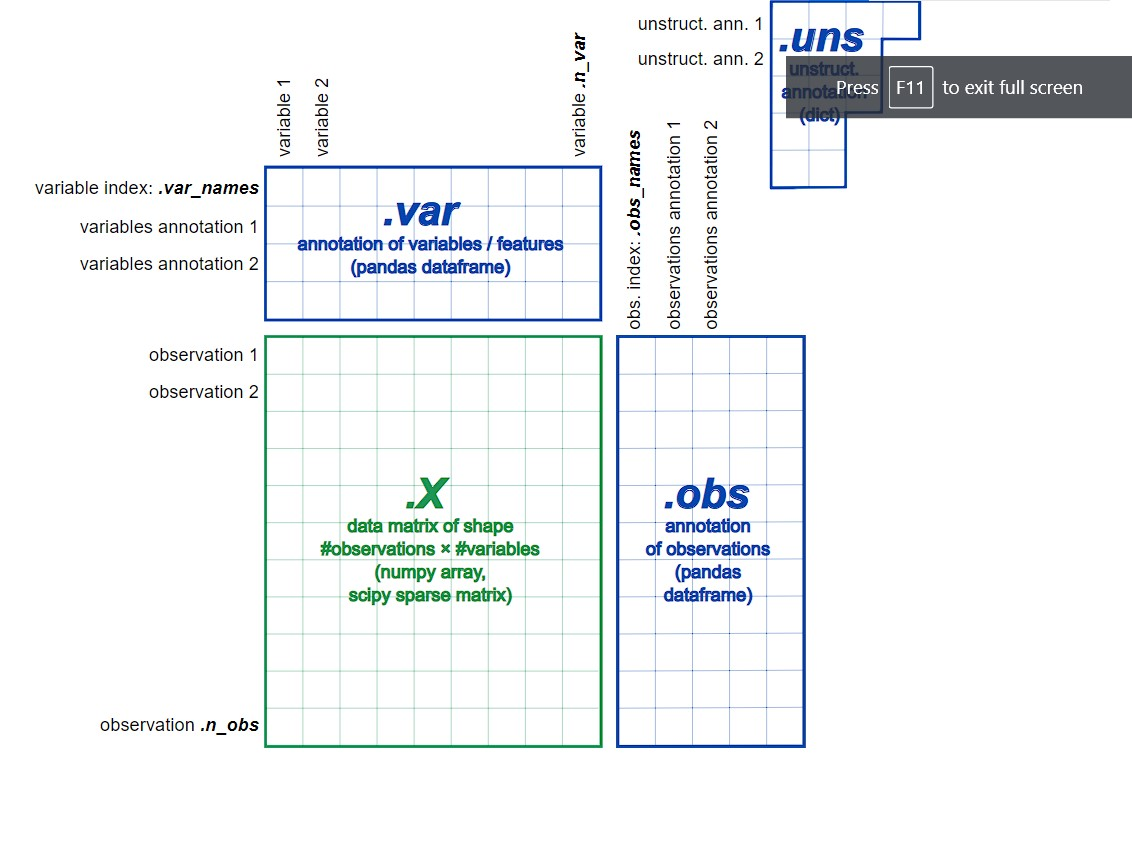

In [3]:
bdata = sc.read('datasets/theory-introto-singlecell-rnaseq-images/test_adata/test_adata.h5ad')

In [4]:
bdata

AnnData object with n_obs × n_vars = 30474 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    obsm: 'isotypes_htos', 'protein_expression'

In [5]:
bdata.obs.head()

,batch_indices,n_genes,percent_mito,leiden_subclusters,cell_types,tissue,batch
index,,,,,,,
AAACCCAAGGGTAATT-1,0,3137,0.062138,"12,0",NKT,Spleen,SLN111-D1
AAACCCAAGGTAAACT-1,0,2256,0.057545,6,CD122+ CD8 T,Spleen,SLN111-D1
AAACCCACACTAGGTT-1,0,1367,0.058373,3,Transitional B,Spleen,SLN111-D1
AAACCCACAGATACCT-1,0,1567,0.065386,4,Mature B,Lymph_Node,SLN111-D1
AAACCCACAGGAATAT-1,0,1895,0.059644,0,CD4 T,Lymph_Node,SLN111-D1


In [7]:
print(bdata.var.shape)
bdata.var.head(10)

(13553, 0)


""
index
Mrpl15
Lypla1
Tcea1
Atp6v1h
Rb1cc1
4732440D04Rik
Pcmtd1
Gm26901
Rrs1


In [8]:
bdata.var_names  # print names of all the genes

Index(['Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', '4732440D04Rik',
       'Pcmtd1', 'Gm26901', 'Rrs1', 'Adhfe1',
       ...
       'Tmlhe', 'AC133103.1', 'AC132444.1', 'Csprs', 'AC132444.6',
       'AC125149.3', 'AC168977.1', 'PISD', 'DHRSX', 'CAAA01147332.1'],
      dtype='object', name='index', length=13553)

In [9]:
bdata.X

<30474x13553 sparse matrix of type '<class 'numpy.float32'>'
	with 43762899 stored elements in Compressed Sparse Row format>

In [10]:
bdata.obs["new_cell_level_data"] = ["test"] * bdata.n_obs  # adds a new column into obs, similar to pandas

In [11]:
bdata.obs.head()

,batch_indices,n_genes,percent_mito,leiden_subclusters,cell_types,tissue,batch,new_cell_level_data
index,,,,,,,,
AAACCCAAGGGTAATT-1,0,3137,0.062138,"12,0",NKT,Spleen,SLN111-D1,test
AAACCCAAGGTAAACT-1,0,2256,0.057545,6,CD122+ CD8 T,Spleen,SLN111-D1,test
AAACCCACACTAGGTT-1,0,1367,0.058373,3,Transitional B,Spleen,SLN111-D1,test
AAACCCACAGATACCT-1,0,1567,0.065386,4,Mature B,Lymph_Node,SLN111-D1,test
AAACCCACAGGAATAT-1,0,1895,0.059644,0,CD4 T,Lymph_Node,SLN111-D1,test


Loading the Data
Brain Counts
Expression matrix where each column corresponds to a gene (or transcript) and each row corresponds to a single cell

In [12]:
# This might take a minute.
count_dataframe = pd.read_csv('datasets/singlecell-rnaseq-data-from-mouse-brain/brain_counts.csv',
                              index_col=0)  # use the first column to label the rows (the 'index')

## print the first 2 rows of our dataframe, The column names represent genes. 
#The row names represent unique cell identifiers that were assigned by the authors of the dataset.
count_dataframe.head(2)

,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B14Rik,0610009B22Rik,...,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,a,l7Rn6,zsGreen_transgene
A1.B003290.3_38_F.1.1,0,125,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,54,0
A1.B003728.3_56_F.1.1,0,0,0,0,0,324,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(count_dataframe.shape)

(3401, 23433)


# Brain Metadata
Metadata describes each cell.

In [15]:
metadata_dataframe = pd.read_csv('datasets/singlecell-rnaseq-data-from-mouse-brain/brain_metadata.csv', index_col=0)
print(metadata_dataframe.shape)
metadata_dataframe.head(2)

(3401, 5)


,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728


In [16]:
print(pd.value_counts(metadata_dataframe['subtissue']))

Cortex         1149
Hippocampus     976
Striatum        723
Cerebellum      553
Name: subtissue, dtype: int64


# Tabular Data
Constructing AnnData using the two csv files
We now have two dataframes, containing the counts and metadata from the Tabula Muris brain dataset. To keep these organized, we'll use a data structure called AnnData.

In [17]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)
print(adata.shape)

(3401, 23433)


C:\Users\301054\AppData\Local\Temp/ipykernel_1824/1047813640.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)


In [18]:
adata.X

array([[  0., 125.,  16., ...,   0.,  54.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 348.,   0., ...,   0., 113.,   0.],
       ...,
       [  0., 135.,  41., ...,   0.,  45.,   0.],
       [  0., 129.,  54., ...,   0.,  57.,   0.],
       [  0.,   1.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [19]:
adata.obs

,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
cell,,,,,
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923
...,...,...,...,...,...
P9.MAA000926.3_9_M.1.1,oligodendrocyte precursor cell,Cortex,M,3_9_M,MAA000926
P9.MAA000930.3_8_M.1.1,astrocyte,Cortex,M,3_8_M,MAA000930
P9.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932


In [20]:
is_spike_in = {}
number_of_spike_ins = 0

for gene_name in adata.var_names:
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # record that we found a spike-in
        number_of_spike_ins += 1 # bump the counter
    else:
        is_spike_in[gene_name] = False # record that this was not a spike-in
        
adata.var['ERCC'] = pd.Series(is_spike_in) # because the index of adata.var and the keys of is_spike_in match, anndata will take care of matching them up
print('found this many spike ins: ', number_of_spike_ins)

found this many spike ins:  92


In [25]:
adata.var.head(20)

,ERCC
0610005C13Rik,False
0610007C21Rik,False
0610007L01Rik,False
0610007N19Rik,False
0610007P08Rik,False
0610007P14Rik,False
0610007P22Rik,False
0610008F07Rik,False
0610009B14Rik,False
0610009B22Rik,False
